In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

gta_imgs = torch.load("gta_imgs.pt", map_location=device)
cs_imgs = torch.load("cs_imgs.pt", map_location=device)
rec_imgs = torch.load("rec_imgs_ls.pt", map_location=device)
gta_imgs=torch.stack(gta_imgs)
cs_imgs = torch.stack(cs_imgs)
rec_imgs= torch.stack(rec_imgs)

## t-SNE ON GTA & CS & REC GTA SEPARATLY

In [5]:
g=gta_imgs.view(500,-1)
c=cs_imgs.view(500,-1)
r=rec_imgs.view(500,-1)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming your tensor is named 'tensor_data'
gta = g.detach().cpu().numpy()
cs = c.detach().cpu().numpy()
rec = r.detach().cpu().numpy()


# Apply t-SNE to reduce dimensionality to 2D
tsne1 = TSNE(n_components=2,verbose=1,random_state=42)

embedded_data1 = tsne1.fit_transform(gta)
embedded_data2 = tsne1.fit_transform(cs)
embedded_data3 = tsne1.fit_transform(rec)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.006s...
[t-SNE] Computed neighbors for 500 samples in 1.262s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 72.949323
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.224094
[t-SNE] KL divergence after 1000 iterations: 1.126271
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.007s...
[t-SNE] Computed neighbors for 500 samples in 0.974s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 70.407472
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.618996
[t-SNE] KL divergence after 1000 iterations: 0.227002
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.008s...
[t-SNE] Computed neighbors for 500 samples in 0.919s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 71.107048
[t-SNE] KL divergence after 250 itera

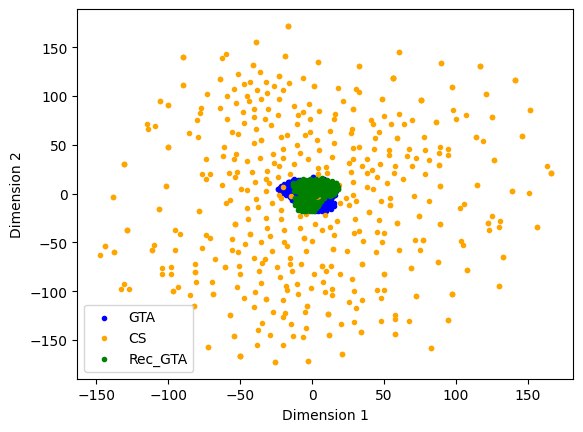

In [6]:
# Plot the t-SNE visualization
plt.scatter(embedded_data1[:, 0], embedded_data1[:, 1], marker='.', color='blue', label='GTA')
plt.scatter(embedded_data2[:, 0], embedded_data2[:, 1], marker='.', color='orange', label='CS')
plt.scatter(embedded_data3[:, 0], embedded_data3[:, 1], marker='.', color='green', label='Rec_GTA')


plt.legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


# T-SNE ON GTA & CS & REC GTA ( CONCATENATED)

In [7]:
all_imgs=torch.cat((gta_imgs.view(500,-1),rec_imgs.view(500,-1),cs_imgs.view(500,-1)))
labels=torch.zeros(all_imgs.shape[0])
labels[500:1000]=1.0
labels[1000:]=2.0

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming your tensor is named 'tensor_data'
tensor_data = all_imgs.detach().cpu().numpy()


# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2,verbose=1,random_state=42)
embedded_data = tsne.fit_transform(tensor_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.017s...
[t-SNE] Computed neighbors for 1500 samples in 2.734s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 84.501575
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.392899
[t-SNE] KL divergence after 1000 iterations: 0.936275


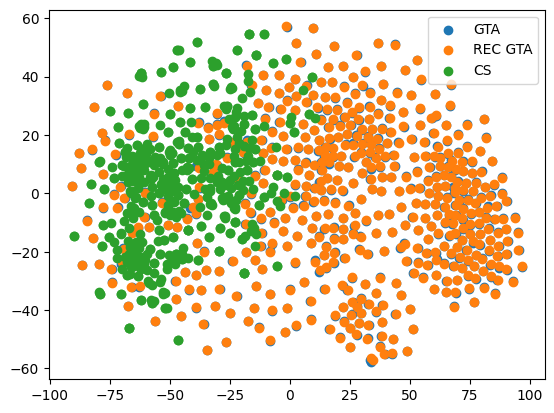

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
groups=pd.DataFrame(embedded_data,columns=['x','y']).assign(category=labels).groupby('category')
fig,ax =plt.subplots()

for name, points in groups:
    if name==1.0:
        name="REC GTA"
        
    else:
        if name ==2.0:
              name="CS"
        else :
             name="GTA"
              
    ax.scatter(points.x, points.y,label=name)

ax.legend()